## Metastability

Computes the Metastability of orthoganlized low-pass filtered rsMEG Data. Following the documentation of Deco et. al 2017 "Single or multiple frequency generators in on-going brain activity: A mechanistic whole-brain model of empirical MEG data"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from scipy.signal import hilbert

In [2]:
os.chdir('orth_results_126') # Execute only once

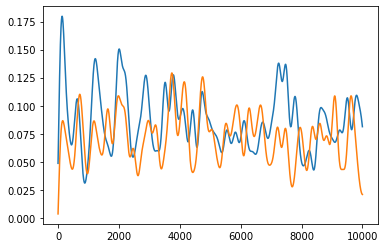

In [5]:
alpha = np.load('Alpha_low-ampl-env.npy') # Loading the low envelope alpha data
beta = np.load('Beta_low-ampl-env.npy')
delta = np.load('Delta_low-ampl-env.npy')
gamma = np.load('Gamma_low-ampl-env.npy')
theta = np.load('Theta_low-ampl-env.npy')

plt.plot(alpha[0,:10000]) # Plot three example signals from area 1-3
plt.plot(alpha[1,:10000])

dict_sig = {'alpha':alpha, 'beta': beta, 'delta': delta, 'gamma': gamma, 'theta': theta} # Save frequencies in dictionary

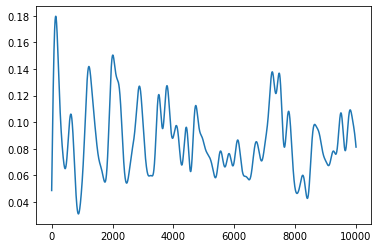

In [7]:
dict_analy = {} # Initialize dictionary for analytic signals
for key, sig in dict_sig.items():
    dict_analy[key] = hilbert(sig, axis=-1) # Compute the hilbert transform of all frequencies

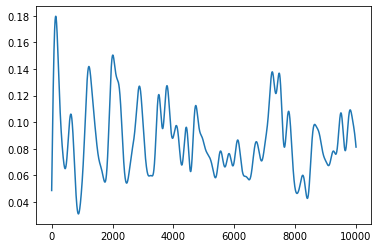

In [10]:
# Plot real-part of signal to check if the hilbert transform worked
plt.plot(np.real(dict_analy['alpha'][0,:10000])) 

In [14]:
dict_phase = {}
for key, analy_sig in dict_analy.items(): 
    dict_phase[key] = np.angle(analy_sig)

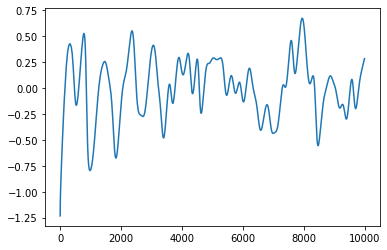

In [15]:
# Plot phase for alpha frequency
plt.plot(dict_phase['alpha'][0,:10000])

In [21]:
dict_kuram = {}
for key, phase in dict_phase.items():
    ima_phase = phase * 1j # Multiply with imaginary element
    sum_phase = np.sum(np.exp(ima_phase), axis=0) # Sum over all areas
    kuramoto = np.abs(sum_phase) / ima_phase.shape[0] # Compute kuramoto parameter
    dict_kuram[key] = kuramoto # Save kuramoto parameter to dictionary

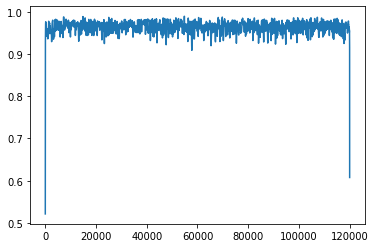

In [32]:
# Plot kuramoto parameter over time
plt.plot(dict_kuram['alpha'][::]) 

In [33]:
dict_meta = {}
for key, kuramoto in dict_kuram.items():
    dict_meta[key] = np.std(kuramoto, ddof=1) # Compute metastability as standard deviation of kuramoto parameter
    print(f"The metastability of {key} is: {dict_meta[key]}")

The metastability of alpha is: 0.012214353313164722
The metastability of beta is: 0.009363349098198128
The metastability of delta is: 0.02205897553256406
The metastability of gamma is: 0.005652645029785663
The metastability of theta is: 0.014897588499274373
